<a href="https://colab.research.google.com/github/JS-DS-coder/CienciaDeDatos2021/blob/master/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensayo Support Vector Machines

El support-vector Machines son modelos de aprendizaje supervizado, que analisa datos para analisis de clasificacion y regresion. Fue desarrollo por los laboratorios AT&T Bell por el sr. Vladimir Vapnik y sus colegas. 

SVM es un algoritmo altamente efectivo, funciona muy bien aun en escenarios con un dataset pequeño, tiende a sufrir overfitting en menor medidas, y ademas tiene predicciones no probabilisticas (0 o 1).

SVM es sensible a anomalias y a diferencias en la escala (por lo que requiere escalado/normalizacion).

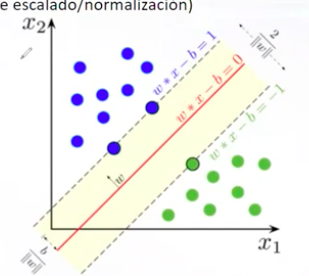

**Hipotesis del SVM**


El algoritmo busca crear un clasificador de margen maximo, es decir que se tenga una distancia maxima hacia el punto mas cercano de cada clase.  Busca crear un clasificador de margen maximo. 

El objetivo del SVM es de solventar problemas de clasificacion encontrando unos limites de decision buenos, entre dos sets de puntos pertenecientes a dos diferente categorias. 

SVM encuentra este limite en dos pasos:

1. los datos son mapeados en una representacion de alta dimensionalidad, donde la frontera o limite de decision puede expresarse como un hiperplano.

2. Un buen limite o frontera de decision (un hiperplano de separacion) es calculado al tratar de maximizar la distancia entre el hyperplano y los puntos de datos mas cercanos de cada clase, esto permite generalizar nuevas muestras no vistas en el entrenamiento antes.

SVM se basa en una expresion condicional obtenido de la expresion lineal comun Mx+b

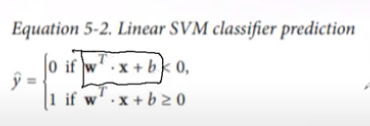


**Funcion de Costo**

La funcion de costo del SVM es conocida como la funcion bisagra o Hinge.

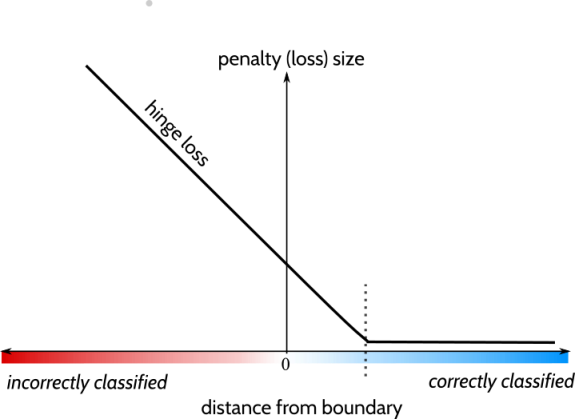

Esa línea de puntos en el eje x representa el número 1. Esto significa que cuando la distancia de una instancia desde el límite es mayor o igual a 1, nuestro tamaño de pérdida es 0. 

Si la distancia desde el límite es 0 (lo que significa que la instancia está literalmente en el límite), incurrimos en un tamaño de pérdida de 1.

Vemos que los puntos clasificados correctamente tendrán un tamaño de pérdida pequeño (o nulo), mientras que las instancias clasificadas incorrectamente tendrán un tamaño de pérdida alto.

Una distancia negativa del límite genera una gran pérdida de bisagra. Básicamente, esto significa que estamos en el lado equivocado del límite y que la instancia se clasificará incorrectamente.


En el tamaño de la tapa, una distancia positiva desde el límite incurre en una pérdida de bisagra baja, o ninguna pérdida de bisagra en absoluto, y cuanto más lejos estemos del límite (y en el lado derecho del mismo), menor será nuestra pérdida de bisagra. 

Funcion matematica:

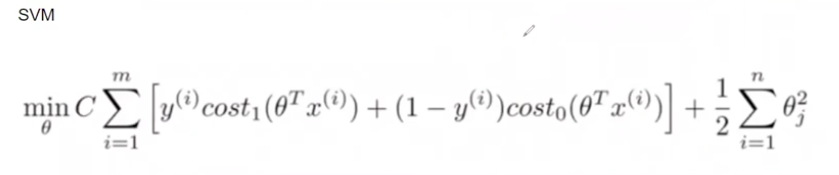


# Entrenamiento de SVM

SVM si requiere efectuar transformacion de datos (feature engineering) para poder lograr la implementacion del SVM. En este notebook omitiremos este paso.

Dataset disponible para este notebook:

[Archivo de Test](https://drive.google.com/file/d/13nw-uRXPY8XIZQxKRNZ3yYlho-CYm_Qt/view)

Veremos tambien el truco del Kernel mas adelante.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
bankdata = pd.read_csv("bill_authentication.csv")
bankdata.shape

(1372, 5)

In [4]:
bankdata.head()

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
X = bankdata.drop('Class', axis=1)
y = bankdata['Class']

SKlearn ya trae una implementacion de SVM. Se utilizara para esta demostracion. A continuacion dividiremos el dataset en datos de entrenamiento y de test

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

Como efectuaremos una tarea de clasificacion, utilizare la clase SVC (support vector clasifier class), que se encuentra como una libreria de scikit-learn. Esta clase toma solo un parametro que es el tipo de kernel. Esto lo explicare mas adelante, pero de momento utilizaremos "linear".  

Luego se debe de llamar a la funcion Fit, para entrenar el algoritmo enviandole el dataset de entrenamiento.


In [7]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
#Modelo entrenado.

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

**Utilizando el modelo entrenado para hacer predicciones**

In [9]:
y_pred = svclassifier.predict(X_test)

**Evaluando el algoritmo**

las formas mas comunes para evaluar las tareas de clasificacion, con la matriz de confusion, la presicion, el recall y las medidas de F1. Scikit Learn ofrece ya estos metodos de la matriz de confusion y las metricas indicadas.



In [11]:
from sklearn.metrics import classification_report, confusion_matrix
print ('Matriz de confusion: ')
print(confusion_matrix(y_test,y_pred))
print('Reporte de clasificacion')
print(classification_report(y_test,y_pred))

Matriz de confusion: 
[[142   2]
 [  0 131]]
Reporte de clasificacion
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       144
           1       0.98      1.00      0.99       131

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



# Kernel SVM

En el ejemplo de entrenamiento, vimos un problema de decision para datos separados de manera lineal. Sin embargo para los casos de problemas no lineales, una linea no puede ser usada como frontera de decision.

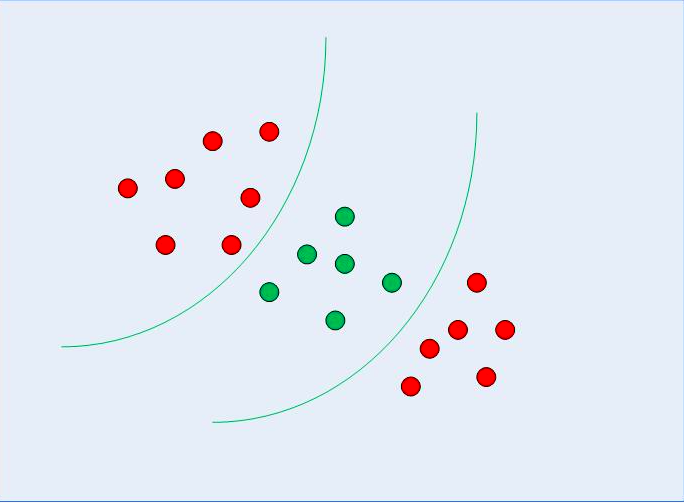

En caso de datos no separados de manera lineal, el algoritmo simple de SVM no puede ser usado. Sino que debe utilziarse una version modificada, llamada Kernel SVM.

Basicamente el Kernel SVM, proyecta datos no separables de manera lineal en dimensiones bajas a datos separables de manera lineal en altas dimensiones.  

Esto lo implementa la funciones de SVM del scikit learn bajo el parametro Kernel.  Los kernel mas comunes son las siguientes:

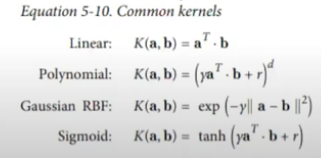